# 引用套件

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.utils import np_utils, plot_model
from keras.models import Sequential, model_from_yaml, load_model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam, SGD

C:\Users\jerry\Anaconda3\envs\tfg\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jerry\Anaconda3\envs\tfg\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jerry\Anaconda3\envs\tfg\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jerry\Anaconda3\envs\tfg\lib\site-packages\tensorflow\python\framework

# 下載人臉資料庫函式

In [2]:
def load_data():
    #path = "D:/face_spyder/train/"
    path = "D:/face_spyder/new_picture/image_up/train/"
    #path = "D:/face_spyder/new_picture/image_up/003_1.1/"
    files = os.listdir(path)
    images = []
    labels = []
    for f in files:
        img_path = path + f
        img = image.load_img(img_path , target_size = (100,100))
        img_array = image.img_to_array(img)
        images.append(img_array)
        lb = f.split('-')
        lb = lb[1].split('.png')
        lb = lb[0]
        labels.append(lb)
        
    data = np.array(images)
    labels = np.array(labels)
    return data,labels

# 下載train_data與分20%跟test_data

In [3]:
images ,labels = load_data()
images /=255.0
(x_train, x_test, y_train, y_test) = train_test_split(images, labels, test_size=0.2)
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

# 打印labels

In [4]:
print("Labels : " ,labels)

Labels :  ['0' '1' '2' ... '2' '3' '4']


# 建立訓練模型

In [5]:
# from keras.models import Sequential, model_from_yaml, load_model
# from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from keras.optimizers import Adam, SGD
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(100, 100, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# #model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# #model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='softmax'))
# model.summary()

In [6]:
from keras.models import Sequential, model_from_yaml, load_model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam, SGD
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()
#sigmoid
#softmax


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)      

# 選擇優化與損失函數

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [8]:
# sgd = Adam(lr=0.0003)
# sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
# model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

# 訓練

In [9]:
train_history = model.fit(x_train, y_train_onehot, batch_size=256, epochs=5, verbose=1, validation_data=(x_test, y_test_onehot))
svae_path = "D:/face_spyder/new_picture/image_up/model/test.h5"


Train on 6725 samples, validate on 1682 samples
Epoch 1/5
6725/6725 [==============================] - 7s 976us/step - loss: 1.0572 - accuracy: 0.5768 - val_loss: 0.3136 - val_accuracy: 0.9608
Epoch 2/5
6725/6725 [==============================] - 4s 609us/step - loss: 0.1176 - accuracy: 0.9665 - val_loss: 0.0155 - val_accuracy: 0.9976
Epoch 3/5
6725/6725 [==============================] - 4s 611us/step - loss: 0.0325 - accuracy: 0.9929 - val_loss: 0.0114 - val_accuracy: 0.9952
Epoch 4/5
6725/6725 [==============================] - 4s 611us/step - loss: 0.0161 - accuracy: 0.9960 - val_loss: 0.0254 - val_accuracy: 0.9917
Epoch 5/5
6725/6725 [==============================] - 4s 614us/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0235 - val_accuracy: 0.9917


# 打印訓練過程

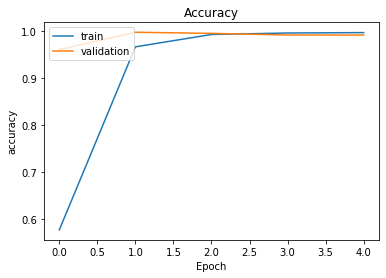

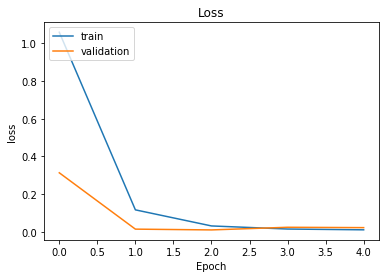

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, title, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(train_history, 'Accuracy', 'accuracy', 'val_accuracy')
show_train_history(train_history, 'Loss', 'loss', 'val_loss')

# 混濁矩陣

In [11]:
import pandas as pd
prediction = model.predict_classes(x_test)
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4
label,,,,,
0,354,0,0,0,0
1,0,351,0,0,0
2,0,0,359,0,0
3,0,0,0,388,0
4,0,1,10,3,216


# 存儲模型

In [12]:
model.save(svae_path)

In [13]:
# from keras.models import load_model
# #model = load_model("D:/face_spyder/model/softmax/softmax_all_6000_size256.h5")
# model = load_model("D:/face_spyder/new_picture/image_up/model/others.h5")
# #model = load_model("D:/face_spyder/people_model/test_other.h5")

In [14]:
# import matplotlib.pyplot as plt
# images = []
# test_path = "D:/face_spyder/test_data/" #要統計的資料夾
# img_total = (len([name for name in os.listdir(test_path) if os.path.isfile(os.path.join(test_path, name))])) 
# def load_data():
#     path = "D:/face_spyder/test_data/"
#     files = os.listdir(test_path)
#     images = []
#     for f in files:
#         img_path = path + f
#         img = image.load_img(img_path , target_size = (100,100))
#         img_array = image.img_to_array(img)
#         images.append(img_array)
        
#     data = np.array(images)
#     return data
# print("--------------------------------------------------Loading data--------------------------------------------------")
# images  = load_data()
# images /=255.0

# predictions = model.predict_on_batch(images)
# from keras.preprocessing.image import array_to_img

# for i in range(img_total):
# #     print("本人 : " ,'%.3f' %predictions[i, 0])
# #     print("others : " ,'%.3f' %predictions[i, 1])
#     print("broung : " ,'%.3f' %predictions[i, 0])
#     print("hao : " ,'%.3f' %predictions[i, 1])
#     print("vincent : " ,'%.3f' %predictions[i, 2])
#     print("teng : " ,'%.3f' %predictions[i, 3])
#     print("others : " ,'%.3f' %predictions[i, 4])
#     plt.imshow(array_to_img(images[i]))
#     plt.show()